# Table of Contents
1. [Import Library](#1)
1. [Load Data](#2)
1. [Data Analysis](#3)
    * [Missing Value](#4)
    * [Distribution](#5)
1. [Feature Engineering](#6)
    * [Analyzing](#7)
    * [Feature Extraction](#8)
1. [Modelling](#9)
    * [Scaling](#10)
    * [Parameters](#11)
    * [Classifiers](#12)
    * [Grid Search Cross Validation and K-Fold](#13)
    * [Visualization](#14)
    * [Prediction](#15)




<a id='1'></a>
# Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<a id='2'></a>
# Load Data

In [2]:
source = '/kaggle/input/fraud-detection-bank-dataset-20k-records-binary/fraud_detection_bank_dataset.csv'
data = pd.read_csv(source)

<a id='3'></a>
# Data Analysis

In [3]:
data.columns

Index(['Unnamed: 0', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8',
       ...
       'col_103', 'col_104', 'col_105', 'col_106', 'col_107', 'col_108',
       'col_109', 'col_110', 'col_111', 'targets'],
      dtype='object', length=114)

In [4]:
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [5]:
data.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5116.750000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,10233.500000,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,15350.250000,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,20467.000000,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


<a id='4'></a>
### Missing Value

In [6]:
missing_count = data.isnull().any().sum()
print(f'Count of features with missing values: {missing_count}')

Count of features with missing values: 0


<a id='5'></a>
### Distribution

In [7]:
data.tail()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0
20467,20467,4,399,0,3,0,1,7,4,0,...,0,1,0,1,1,0,0,0,72,0


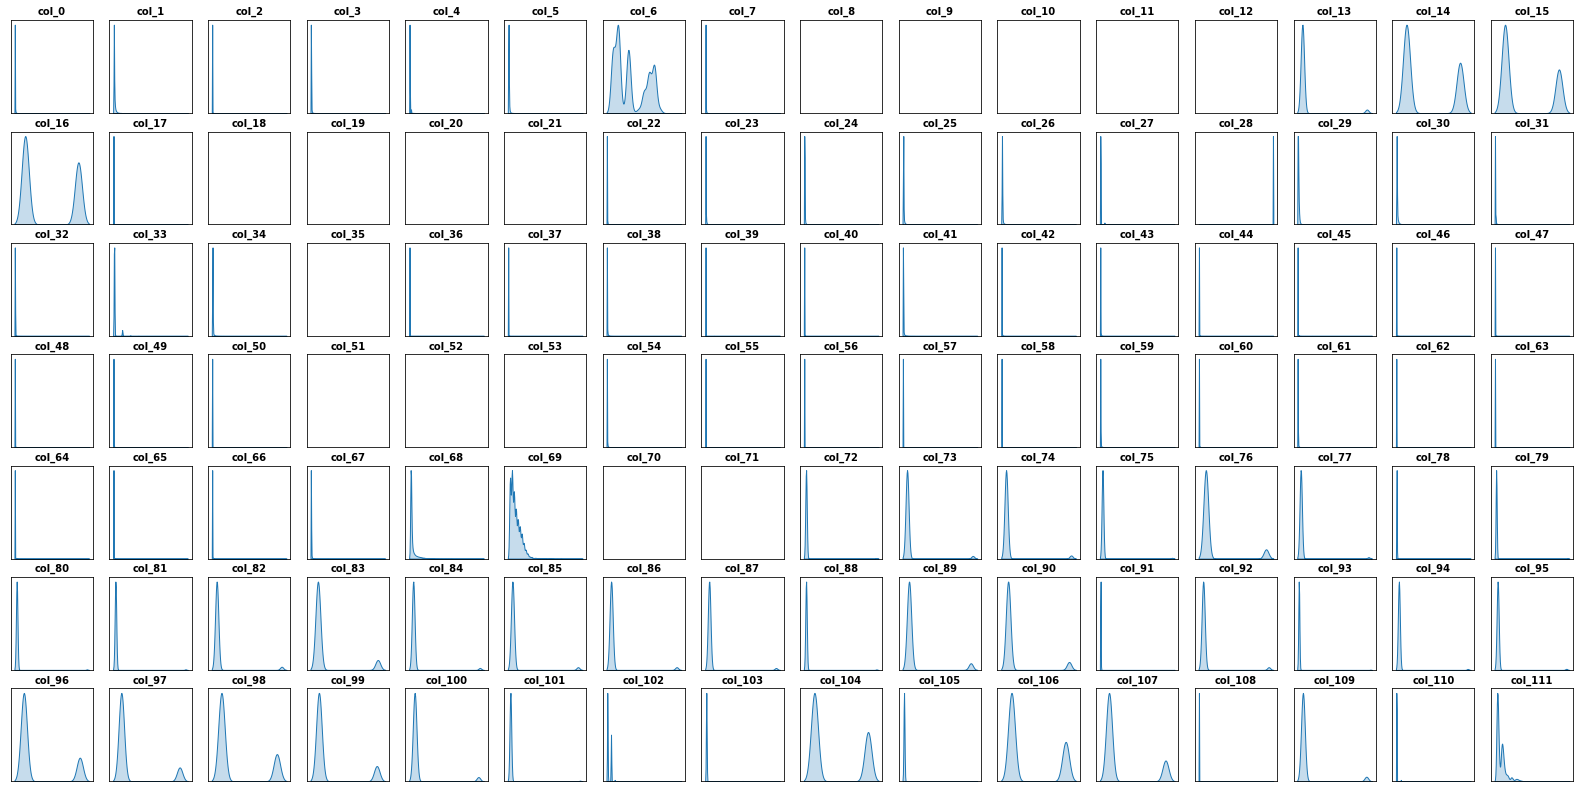

In [8]:
fig, axes = plt.subplots(7,16,figsize=(28,14))
axes = axes.flatten()

for col, ax in enumerate(axes):
    sns.kdeplot(data=data, x=f'col_{col}', 
                fill=True, 
                ax=ax)
 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'col_{col}', loc='center', weight='bold', fontsize=10)

plt.show()

#### Column List:
   * 8-9-10-11-12-18-19-20-21-35-51-52-53-70-71 
   
   
As the features in column list has a single value, we're dropping that from dataset.

In [9]:
drop_list=['col_8','col_9','col_10','col_11','col_12','col_18','col_19','col_20','col_21','col_35','col_51','col_52','col_53','col_70','col_71']
data.drop(drop_list,axis=1,inplace=True)

In [10]:
col_list = ['index']
last_one = len(data.columns)-1
for i in range(last_one):
    if i != last_one-1:
        col_list.append(f'col_{i}')

col_list.append('targets')

data = data.set_axis(col_list,axis=1)

In [11]:
data.head()

,index,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


<a id='6'></a>
# Feature Engineering

<a id='7'></a>
### Analyzing

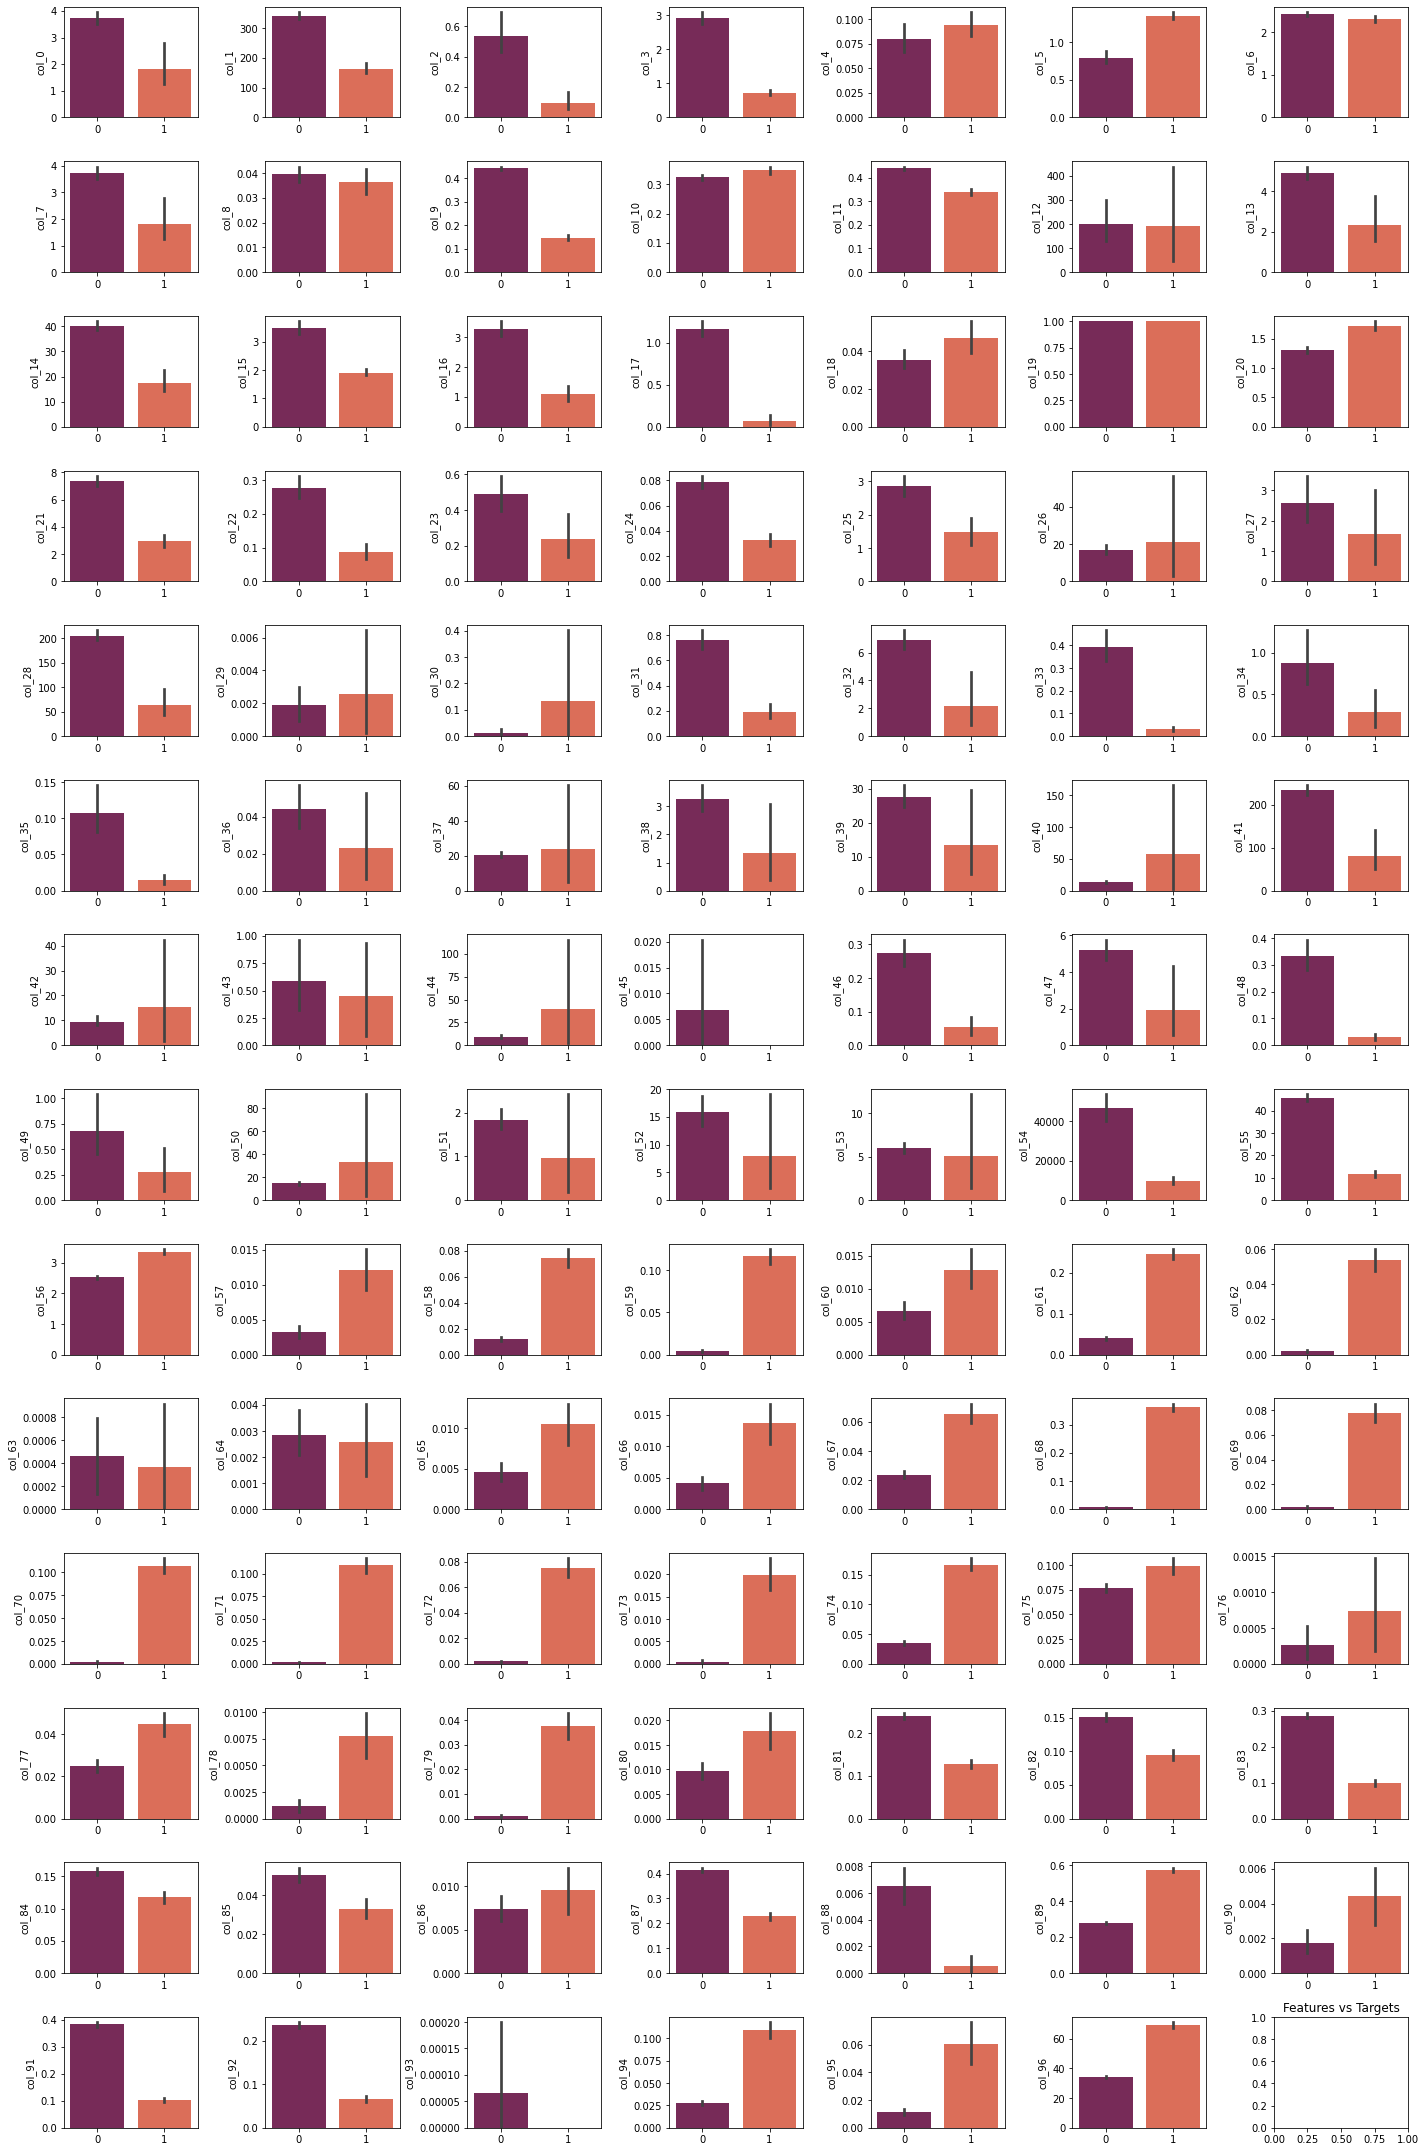

In [12]:
fig, axes = plt.subplots(14,7,figsize=(20,30))
axes = axes.flatten()

counter = 0

for col, ax in enumerate(axes):
    counter += 1
    y = f'col_{col}'
    
    if counter<98:
        sns.barplot(data=data, 
                    x='targets',
                    y=y, 
                    palette='rocket', 
                    ax=ax)

        ax.set_xlabel('')
        
plt.title('Features vs Targets')
plt.tight_layout()
plt.show()


<a id='8'></a>
### Feature Extraction

In [13]:
data['c0'] = [0 if i > 3 else 1 for i in data.col_0]
data['c1'] = [0 if i > 200 else 1 for i in data.col_1]
data['c2'] = [0 if i > 0.4 else 1 for i in data.col_2]
data['c3'] = [0 if i > 2 else 1 for i in data.col_3]
data['c5'] = [1 if i > 1 else 0 for i in data.col_5]
data['c7'] = [0 if i > 3 else 1 for i in data.col_7]
data['c9'] = [0 if i > 0.2 else 1 for i in data.col_9]

data['c11'] = [0 if i > 0.4 else 1 for i in data.col_11]
data['c13'] = [0 if i > 4 else 1 for i in data.col_13]
data['c14'] = [0 if i > 30 else 1 for i in data.col_14]
data['c15'] = [0 if i > 3 else 1 for i in data.col_15]
data['c16'] = [0 if i > 2 else 1 for i in data.col_16]
data['c17'] = [0 if i > 1 else 1 for i in data.col_17]

data['c20'] = [0 if i > 1.5 else 1 for i in data.col_20]
data['c21'] = [0 if i > 5 else 1 for i in data.col_21]
data['c22'] = [0 if i > 0.2 else 1 for i in data.col_22]
data['c23'] = [0 if i > 0.4 else 1 for i in data.col_23]
data['c24'] = [0 if i > 0.05 else 1 for i in data.col_24]
data['c25'] = [0 if i > 2 else 1 for i in data.col_25]
data['c28'] = [0 if i > 150 else 1 for i in data.col_28]

data['c31'] = [0 if i > 0.5 else 1 for i in data.col_31]
data['c32'] = [0 if i > 5 else 1 for i in data.col_32]
data['c33'] = [0 if i > 0.3 else 1 for i in data.col_33]
data['c35'] = [0 if i > 0.05 else 1 for i in data.col_35]

data['c41'] = [0 if i > 150 else 1 for i in data.col_41]
data['c46'] = [0 if i > 0.2 else 1 for i in data.col_46]
data['c47'] = [0 if i > 4 else 1 for i in data.col_47]
data['c27'] = [0 if i > 0.4 else 1 for i in data.col_27]
data['c48'] = [0 if i > 0.2 else 1 for i in data.col_48]

data['c54'] = [0 if i > 30000 else 1 for i in data.col_54]
data['c55'] = [0 if i > 30 else 1 for i in data.col_55]
data['c57'] = [1 if i > 0.005 else 0 for i in data.col_57]
data['c58'] = [1 if i > 0.05 else 0 for i in data.col_58]
data['c59'] = [1 if i > 0.05 else 0 for i in data.col_59]

data['c61'] = [1 if i > 0.1 else 0 for i in data.col_61]
data['c62'] = [1 if i > 0.02 else 0 for i in data.col_62]
data['c66'] = [1 if i > 0.01 else 0 for i in data.col_66]
data['c67'] = [1 if i > 0.04 else 0 for i in data.col_67]
data['c68'] = [1 if i > 0.1 else 0 for i in data.col_68]
data['c69'] = [1 if i > 0.025 else 0 for i in data.col_69]

data['c70'] = [1 if i > 0.05 else 0 for i in data.col_70]
data['c71'] = [1 if i > 0.05 else 0 for i in data.col_71]
data['c72'] = [1 if i > 0.025 else 0 for i in data.col_72]
data['c73'] = [1 if i > 0.01 else 0 for i in data.col_73]
data['c74'] = [1 if i > 0.1 else 0 for i in data.col_74]
data['c78'] = [1 if i > 0.05 else 0 for i in data.col_78]
data['c79'] = [1 if i > 0.02 else 0 for i in data.col_79]

data['c83'] = [0 if i > 0.2 else 1 for i in data.col_83]
data['c88'] = [0 if i > 0.005 else 1 for i in data.col_88]

data['c91'] = [0 if i > 0.3 else 1 for i in data.col_91]
data['c92'] = [0 if i > 0.2 else 1 for i in data.col_92]
data['c94'] = [1 if i > 0.05 else 0 for i in data.col_94]
data['c95'] = [1 if i > 0.04 else 0 for i in data.col_95]


In [14]:
data.head()

,index,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,c73,c74,c78,c79,c83,c88,c91,c92,c94,c95
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,1,1,1,1,0,0
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,17,682,0,1,0,0,8,17,0,...,0,0,0,0,0,1,0,0,0,0
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,0,0,1,0,0,0,0


<a id='9'></a>
# Modelling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(['targets'],axis=1)
y= data.targets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

<a id='10'></a>
## Scaling

In [18]:
#from sklearn.preprocessing import StandardScaler

In [19]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

<a id='11'></a>
## Parameters

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

        
knn_params = {'n_neighbors':np.arange(1,50)}

nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}

rf_params =  {'max_features':[1,3,10],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[False],
              'n_estimators':[100,300],
              'criterion':['gini']}

gb_params = {'learning_rate':[0.001,0.01,0.1,0.05],
            'n_estimators':[100,500,100],
            'max_depth':[3,5,10],
            'min_samples_split':[2,5,10]
    
}

param = [rf_params,knn_params,nb_params,gb_params]

<a id='12'></a>
## Classifiers

In [21]:
classifier = [RandomForestClassifier(),
              KNeighborsClassifier(),
              GaussianNB(),
              GradientBoostingClassifier()
             ]

ml_list = ['Random Forest','KNN','Naive Bayes','GradientBoosting']

<a id='13'></a>
## Grid Search Cross Validation and K-Fold

In [22]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score


cv_results = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i],
                            param_grid=[param[i]],
                            cv = StratifiedKFold(n_splits=5),
                            scoring = 'roc_auc',
                             n_jobs= -1,
                             verbose = 1
                        
                            )
    clf.fit(X_train,y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print('Method: {}  Score: {} Best: {}' .format(classifier[i],cv_results[i],clf.best_estimator_))
    
results = pd.DataFrame({'CV Means':cv_results,
                       'ML Models':ml_list})

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  4.0min finished


Method: RandomForestClassifier()  Score: 0.9999990686099188 Best: RandomForestClassifier(bootstrap=False, max_features=10)
Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  1.7min finished


Method: KNeighborsClassifier()  Score: 0.9992900398160499 Best: KNeighborsClassifier(n_neighbors=20)
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   10.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.8s finished


Method: GaussianNB()  Score: 0.9934626888896227 Best: GaussianNB(var_smoothing=1.2328467394420658e-05)
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 36.4min finished


Method: GradientBoostingClassifier()  Score: 1.0 Best: GradientBoostingClassifier(learning_rate=0.001)


<a id='14'></a>
## Visualization

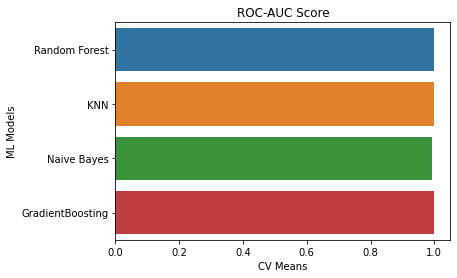

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.barplot('CV Means','ML Models',data=results)
g.set_title('ROC-AUC Score')
plt.show()

<a id='15'></a>
## Prediction

In [24]:
from sklearn.ensemble import VotingClassifier
voting_c = VotingClassifier(estimators=[('rf',best_estimators[0]),
                                        ('knn',best_estimators[1]),
                                        ('nb',best_estimators[2]),
                                        ('gb',best_estimators[3])
                                       ],
                           voting='soft',
                           n_jobs=-1)

voting_c = voting_c.fit(X_train,y_train)
my_score = accuracy_score(voting_c.predict(X_test),y_test)
print(my_score)

0.995114802149487
